# Sequencing data quality check and preprocessing

# 1. Importing data
### 1.1 Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import Ecocyc_Parse as ep

pd.set_option('max_columns', 99)

%matplotlib inline

In [2]:
countdf = pd.read_csv('countdata.txt', header = 0, index_col = 0, sep = '\t')
countdf.head()

,T1-L50-02,OD-L25-01,OD-L01-01,T1-L50-03,T1-L50-01,OD-L25-02,T0-L01-08,OD-L01-02,OD-L25-03,T1-L50-04,T1-L50-11,T1-L50-05,OD-L25-04,T1-L50-07,T1-L50-12,OD-L25-05,T1-L01-04,T1-L01-10,T1-L01-11,T1-L01-07,T1-L01-12,T1-L01-02,OD-L50-01,T0-L50-08,T0-L50-09,T0-L50-04,T0-L50-07,T0-L50-06,T0-L50-02,T0-L50-03,T1-L01-08,T0-L50-01,T1-L01-09,T0-L01-02,T0-L25-14,T1-L50-08,T1-L50-09,T0-L25-15,T0-L01-05,T0-L25-10,T0-L01-12,T0-L01-06,T0-L25-13
ECB_RS00005,51.0,388.0,137.0,24.0,43.0,239.0,355.0,76.0,453.0,64.0,19.0,52.0,229.0,23.0,25.0,225.0,173.0,61.0,95.0,352.0,41.0,59.0,1.0,184.0,253.0,226.0,179.0,307.0,298.0,268.0,29.0,380.0,208.0,89.0,969.0,17.0,31.0,689.0,439.0,3.0,234.0,424.0,520.0
ECB_RS00010,999.0,4459.0,44.0,750.0,771.0,3179.0,27.0,16.0,2578.0,1066.0,740.0,578.0,1842.0,818.0,620.0,2259.0,43.0,22.0,91.0,120.0,8.0,68.0,37.0,314.0,297.0,281.0,175.0,156.0,313.0,249.0,65.0,176.0,180.0,6.0,761.0,558.0,1007.0,579.0,111.0,4.0,15.0,79.0,642.0
ECB_RS00015,274.0,797.0,17.0,240.0,222.0,1015.0,11.0,8.0,677.0,297.0,254.0,149.0,427.0,304.0,181.0,717.0,11.0,10.0,34.0,54.0,1.0,24.0,21.0,111.0,102.0,132.0,63.0,61.0,129.0,120.0,31.0,67.0,89.0,3.0,192.0,209.0,357.0,153.0,46.0,3.0,9.0,33.0,166.0
ECB_RS00020,404.0,2212.0,15.0,268.0,309.0,1856.0,21.0,4.0,1534.0,415.0,292.0,220.0,958.0,355.0,209.0,1218.0,15.0,7.0,36.0,59.0,3.0,40.0,22.0,198.0,222.0,169.0,186.0,161.0,164.0,197.0,33.0,124.0,128.0,8.0,354.0,247.0,408.0,253.0,59.0,2.0,7.0,37.0,349.0
ECB_RS00030,78.0,678.0,40.0,62.0,76.0,420.0,14.0,17.0,569.0,104.0,57.0,63.0,309.0,88.0,53.0,318.0,10.0,3.0,14.0,23.0,1.0,5.0,6.0,79.0,120.0,89.0,98.0,85.0,64.0,108.0,6.0,67.0,57.0,3.0,186.0,40.0,85.0,137.0,20.0,3.0,4.0,15.0,166.0


### 1.2 Preprocessing data

In [3]:
# get rid of post ampicillin treatment data
countdf_no_amp = countdf.drop(countdf.columns[countdf.columns.str.contains("T1")],axis = 1)
countdf_no_amp.head(3)

,OD-L25-01,OD-L01-01,OD-L25-02,T0-L01-08,OD-L01-02,OD-L25-03,OD-L25-04,OD-L25-05,OD-L50-01,T0-L50-08,T0-L50-09,T0-L50-04,T0-L50-07,T0-L50-06,T0-L50-02,T0-L50-03,T0-L50-01,T0-L01-02,T0-L25-14,T0-L25-15,T0-L01-05,T0-L25-10,T0-L01-12,T0-L01-06,T0-L25-13
ECB_RS00005,388.0,137.0,239.0,355.0,76.0,453.0,229.0,225.0,1.0,184.0,253.0,226.0,179.0,307.0,298.0,268.0,380.0,89.0,969.0,689.0,439.0,3.0,234.0,424.0,520.0
ECB_RS00010,4459.0,44.0,3179.0,27.0,16.0,2578.0,1842.0,2259.0,37.0,314.0,297.0,281.0,175.0,156.0,313.0,249.0,176.0,6.0,761.0,579.0,111.0,4.0,15.0,79.0,642.0
ECB_RS00015,797.0,17.0,1015.0,11.0,8.0,677.0,427.0,717.0,21.0,111.0,102.0,132.0,63.0,61.0,129.0,120.0,67.0,3.0,192.0,153.0,46.0,3.0,9.0,33.0,166.0


In [4]:
countdf_no_amp.columns.str.slice(0,6)

Index(['OD-L25', 'OD-L01', 'OD-L25', 'T0-L01', 'OD-L01', 'OD-L25', 'OD-L25',
       'OD-L25', 'OD-L50', 'T0-L50', 'T0-L50', 'T0-L50', 'T0-L50', 'T0-L50',
       'T0-L50', 'T0-L50', 'T0-L50', 'T0-L01', 'T0-L25', 'T0-L25', 'T0-L01',
       'T0-L25', 'T0-L01', 'T0-L01', 'T0-L25'],
      dtype='object')

In [5]:
replace_dict = {
    'OD-L01':1,
    'OD-L25':2,
    'OD-L50':3,
    'T0-L01':4,
    'T0-L25':5,
    'T0-L50':6
}

In [6]:
# create label for each replica 
labels = pd.DataFrame(countdf_no_amp.columns.str.slice(0,6)).replace(replace_dict).iloc[:, 0].tolist()
labels

[2, 1, 2, 4, 1, 2, 2, 2, 3, 6, 6, 6, 6, 6, 6, 6, 6, 4, 5, 5, 4, 5, 4, 4, 5]

In [7]:
pre_X = countdf_no_amp.transpose()
pre_X.head(3)

,ECB_RS00005,ECB_RS00010,ECB_RS00015,ECB_RS00020,ECB_RS00030,ECB_RS00035,ECB_RS00040,ECB_RS00045,ECB_RS00050,ECB_RS00055,ECB_RS00060,ECB_RS00065,ECB_RS00070,ECB_RS00075,ECB_RS00080,ECB_RS00085,ECB_RS00090,ECB_RS00095,ECB_RS00100,ECB_RS00105,ECB_RS00110,ECB_RS00120,ECB_RS00125,ECB_RS00130,ECB_RS00135,ECB_RS00140,ECB_RS00145,ECB_RS00150,ECB_RS00155,ECB_RS00160,ECB_RS00165,ECB_RS00170,ECB_RS00185,ECB_RS00190,ECB_RS00200,ECB_RS00205,ECB_RS00210,ECB_RS00215,ECB_RS00220,ECB_RS00225,ECB_RS00230,ECB_RS00235,ECB_RS00240,ECB_RS00245,ECB_RS00250,ECB_RS00255,ECB_RS00260,ECB_RS00265,ECB_RS00270,...,ECB_RS22570,ECB_RS22575,ECB_RS22580,ECB_RS22585,ECB_RS22590,ECB_RS22595,ECB_RS22600,ECB_RS22605,ECB_RS22610,ECB_RS22615,ECB_RS22620,ECB_RS22625,ECB_RS22630,ECB_RS22635,ECB_RS22640,ECB_RS22645,ECB_RS22650,ECB_RS22655,ECB_RS22660,ECB_RS22665,ECB_RS22670,ECB_RS22675,ECB_RS22680,ECB_RS22685,ECB_RS22695,ECB_RS22700,ECB_RS22705,ECB_RS22710,ECB_RS22715,ECB_RS25685,ECB_RS25690,ECB_RS22730,ECB_RS22735,ECB_RS22740,ECB_RS22750,ECB_RS22755,ECB_RS22760,ECB_RS22765,ECB_RS22770,ECB_RS22775,ECB_RS22780,ECB_RS22785,ECB_RS22790,ECB_RS22795,ECB_RS22800,ECB_RS22805,ECB_RS22810,pGFP,MicL-S
OD-L25-01,388.0,4459.0,797.0,2212.0,678.0,135.0,47.0,6882.0,125.0,30.0,17.0,10.0,7049.0,441.0,114.0,19.0,67.0,20.0,5.0,2.0,1.0,0.009747,3.0,2692.0,21.0,567.0,3189.0,203.0,182.0,124.0,88.0,253.0,2013.0,3101.0,5.0,4.0,1.0,15.0,4.0,24.0,3.0,3.0,6.0,6.0,0.0,2.0,6.0,37.0,100.0,...,387.0,106.0,95.0,109.0,7.0,21.0,0.0,383.0,4557.0,561.0,70.5560,26.3319,70.5560,247.0,65.0,58.0,145.0,372.0,53.0,8.0,103.0,32.0,3.0,15.0,137.0,75.0,404.0,469.0,56.0,198.0,100.0,143.0,174.0,137.0,680.0,229.0,48.0,37.0,50.0,1454.0,23.0,18.0,46.0,14.0,1190.0,498.0,26.0,9422.0,0.0
OD-L01-01,137.0,44.0,17.0,15.0,40.0,15.0,10.0,875.0,55.0,11.0,5.0,1.0,249.0,5.0,10.6,46.0,56.0,6.0,0.0,1.0,1.0,0.009763,0.0,24.0,5.0,16.0,18.0,4.0,2.0,22.0,3.0,17.0,1.0,11.0,25.0,1.0,4.0,3.0,4.0,17.0,0.0,0.0,0.0,2.0,0.0,2.0,10.0,11.0,376.0,...,22.0,15.0,14.0,29.0,3.0,6.0,0.0,3.0,5.0,1.0,58.9487,32.1538,58.9487,24.0,2.0,31.0,39.0,13.0,586.0,101.0,4.0,3.0,1.0,76.0,93.0,76.0,227.0,316.0,20.0,7.0,10.0,2.0,2.0,84.0,36.0,52.0,1.0,5.0,12.0,2121.0,5.0,2.0,4.0,1.0,3097.0,947.0,0.0,2120.0,3.0
OD-L25-02,239.0,3179.0,1015.0,1856.0,420.0,97.0,33.0,4390.0,113.0,31.0,8.0,8.0,3903.0,329.0,100.0,13.0,39.0,13.0,4.0,3.0,2.0,0.009529,0.0,1566.0,11.0,409.0,2038.0,132.0,114.0,136.0,45.0,144.0,1552.0,2684.0,14.0,3.0,2.0,18.0,3.0,8.0,0.0,3.0,1.0,2.0,0.0,1.0,11.0,29.0,58.0,...,260.0,77.0,55.0,73.0,10.0,14.0,1.0,249.0,2715.0,458.0,31.3333,16.0000,31.3333,143.0,46.0,38.0,106.0,317.0,55.0,14.0,41.0,23.0,4.0,11.0,108.0,77.0,504.0,433.0,36.0,179.0,66.0,85.0,163.0,152.0,491.0,151.0,39.0,47.0,46.0,907.0,37.0,23.0,28.0,6.0,921.0,323.0,17.0,9998.0,1.0


In [8]:
pre_X["con"]=countdf_no_amp.columns.str.slice(0,6)
pre_X.head(3)

,ECB_RS00005,ECB_RS00010,ECB_RS00015,ECB_RS00020,ECB_RS00030,ECB_RS00035,ECB_RS00040,ECB_RS00045,ECB_RS00050,ECB_RS00055,ECB_RS00060,ECB_RS00065,ECB_RS00070,ECB_RS00075,ECB_RS00080,ECB_RS00085,ECB_RS00090,ECB_RS00095,ECB_RS00100,ECB_RS00105,ECB_RS00110,ECB_RS00120,ECB_RS00125,ECB_RS00130,ECB_RS00135,ECB_RS00140,ECB_RS00145,ECB_RS00150,ECB_RS00155,ECB_RS00160,ECB_RS00165,ECB_RS00170,ECB_RS00185,ECB_RS00190,ECB_RS00200,ECB_RS00205,ECB_RS00210,ECB_RS00215,ECB_RS00220,ECB_RS00225,ECB_RS00230,ECB_RS00235,ECB_RS00240,ECB_RS00245,ECB_RS00250,ECB_RS00255,ECB_RS00260,ECB_RS00265,ECB_RS00270,...,ECB_RS22575,ECB_RS22580,ECB_RS22585,ECB_RS22590,ECB_RS22595,ECB_RS22600,ECB_RS22605,ECB_RS22610,ECB_RS22615,ECB_RS22620,ECB_RS22625,ECB_RS22630,ECB_RS22635,ECB_RS22640,ECB_RS22645,ECB_RS22650,ECB_RS22655,ECB_RS22660,ECB_RS22665,ECB_RS22670,ECB_RS22675,ECB_RS22680,ECB_RS22685,ECB_RS22695,ECB_RS22700,ECB_RS22705,ECB_RS22710,ECB_RS22715,ECB_RS25685,ECB_RS25690,ECB_RS22730,ECB_RS22735,ECB_RS22740,ECB_RS22750,ECB_RS22755,ECB_RS22760,ECB_RS22765,ECB_RS22770,ECB_RS22775,ECB_RS22780,ECB_RS22785,ECB_RS22790,ECB_RS22795,ECB_RS22800,ECB_RS22805,ECB_RS22810,pGFP,MicL-S,con
OD-L25-01,388.0,4459.0,797.0,2212.0,678.0,135.0,47.0,6882.0,125.0,30.0,17.0,10.0,7049.0,441.0,114.0,19.0,67.0,20.0,5.0,2.0,1.0,0.009747,3.0,2692.0,21.0,567.0,3189.0,203.0,182.0,124.0,88.0,253.0,2013.0,3101.0,5.0,4.0,1.0,15.0,4.0,24.0,3.0,3.0,6.0,6.0,0.0,2.0,6.0,37.0,100.0,...,106.0,95.0,109.0,7.0,21.0,0.0,383.0,4557.0,561.0,70.5560,26.3319,70.5560,247.0,65.0,58.0,145.0,372.0,53.0,8.0,103.0,32.0,3.0,15.0,137.0,75.0,404.0,469.0,56.0,198.0,100.0,143.0,174.0,137.0,680.0,229.0,48.0,37.0,50.0,1454.0,23.0,18.0,46.0,14.0,1190.0,498.0,26.0,9422.0,0.0,OD-L25
OD-L01-01,137.0,44.0,17.0,15.0,40.0,15.0,10.0,875.0,55.0,11.0,5.0,1.0,249.0,5.0,10.6,46.0,56.0,6.0,0.0,1.0,1.0,0.009763,0.0,24.0,5.0,16.0,18.0,4.0,2.0,22.0,3.0,17.0,1.0,11.0,25.0,1.0,4.0,3.0,4.0,17.0,0.0,0.0,0.0,2.0,0.0,2.0,10.0,11.0,376.0,...,15.0,14.0,29.0,3.0,6.0,0.0,3.0,5.0,1.0,58.9487,32.1538,58.9487,24.0,2.0,31.0,39.0,13.0,586.0,101.0,4.0,3.0,1.0,76.0,93.0,76.0,227.0,316.0,20.0,7.0,10.0,2.0,2.0,84.0,36.0,52.0,1.0,5.0,12.0,2121.0,5.0,2.0,4.0,1.0,3097.0,947.0,0.0,2120.0,3.0,OD-L01
OD-L25-02,239.0,3179.0,1015.0,1856.0,420.0,97.0,33.0,4390.0,113.0,31.0,8.0,8.0,3903.0,329.0,100.0,13.0,39.0,13.0,4.0,3.0,2.0,0.009529,0.0,1566.0,11.0,409.0,2038.0,132.0,114.0,136.0,45.0,144.0,1552.0,2684.0,14.0,3.0,2.0,18.0,3.0,8.0,0.0,3.0,1.0,2.0,0.0,1.0,11.0,29.0,58.0,...,77.0,55.0,73.0,10.0,14.0,1.0,249.0,2715.0,458.0,31.3333,16.0000,31.3333,143.0,46.0,38.0,106.0,317.0,55.0,14.0,41.0,23.0,4.0,11.0,108.0,77.0,504.0,433.0,36.0,179.0,66.0,85.0,163.0,152.0,491.0,151.0,39.0,47.0,46.0,907.0,37.0,23.0,28.0,6.0,921.0,323.0,17.0,9998.0,1.0,OD-L25


# 2. PCA analysis

In [9]:
# strandardization
X_norm = StandardScaler().fit_transform(countdf_no_amp.transpose())
X_norm.shape

(25, 4490)

In [10]:
pca = PCA()
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'Explained Variance Per Principal Component')

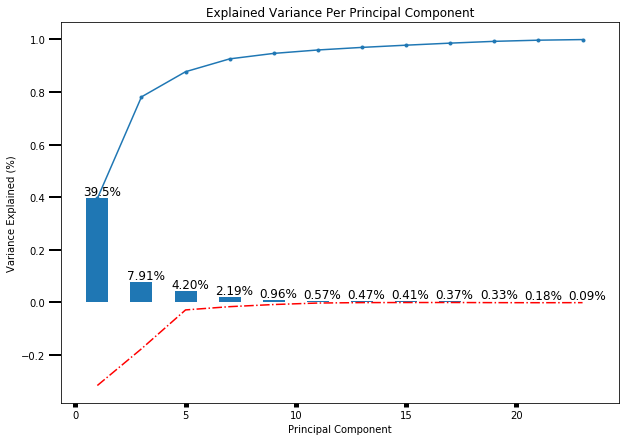

In [11]:
num_components=len(pca.explained_variance_ratio_)
ind = np.arange(1, num_components, 2)
vals = pca.explained_variance_ratio_

plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)[ind-1]
ax.bar(ind, vals[ind-1], width = 1)
ax.plot(ind, cumvals,'.-')
ax.plot(ind, np.gradient(vals[ind-1]),'r-.')

for i in ind:
    ax.annotate(r"%s%%" % ((str(vals[i-1]*100)[:4])), (i+0.2, vals[i-1]), va="bottom", ha="center", fontsize=12)

ax.xaxis.set_tick_params(width=5)
ax.yaxis.set_tick_params(width=2, length=12)
 
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')

In [12]:
pca3 = PCA(n_components=6)
pca3.fit(X_norm)
# Store results of PCA in a data frame
result=pd.DataFrame(pca3.transform(X_norm), columns=['PCA%i' % i for i in range(6)], index=countdf_no_amp.columns)

In [13]:
result["con"]=countdf_no_amp.columns.str.slice(0,6)
result.head(3)

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,con
OD-L25-01,43.265226,80.991029,29.816080,-15.514157,-16.396759,-8.171412,OD-L25
OD-L01-01,-45.324151,-9.656651,41.978865,18.759419,-12.346992,39.457645,OD-L01
OD-L25-02,15.398302,55.387198,15.819488,-17.013936,-12.430083,-6.491053,OD-L25


In [14]:
"""ann_tuple = [
    ('OD-L01',1),
    ('OD-L25',2),
    ('OD-L50',3),
    ('T0-L01',4),
    ('T0-L25',5),
    ('T0-L50',6)
]"""

"ann_tuple = [\n    ('OD-L01',1),\n    ('OD-L25',2),\n    ('OD-L50',3),\n    ('T0-L01',4),\n    ('T0-L25',5),\n    ('T0-L50',6)\n]"

In [15]:
ann_tuple = [
    ('OD-L01','B1-L01',1),
    ('OD-L25','B1-L25',2),
    ('OD-L50','B1-L50',3),
    ('T0-L01','B2-L01',4),
    ('T0-L25','B2-L25',5),
    ('T0-L50','B2-L50',6)
]

In [16]:
result.loc[result['con']=='T0-L01'].PCA0.mean()

-26.838989078136024

<Figure size 432x288 with 0 Axes>

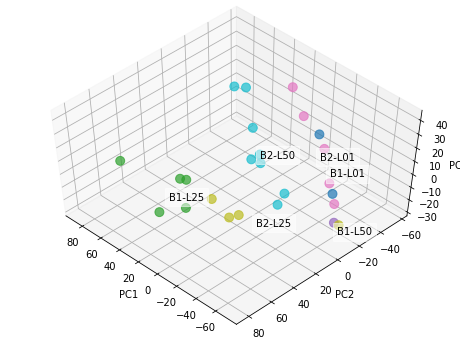

In [17]:
# Plot initialisation
plt.figure()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=labels, cmap="tab10", s=80, alpha=0.7)

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
#ax.set_title("PCA on the RNA sequencing data set")

samplelist = countdf_no_amp.columns.tolist()
cordinates = list(zip(result.PCA0, result.PCA1, result.PCA2))

for con, name, label in ann_tuple:
    ax.text3D(result.loc[result['con']== con ].PCA0.mean()-20,
              result.loc[result['con']== con ].PCA1.mean(),
              result.loc[result['con']== con ].PCA2.mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax.view_init(55, 135)
plt.savefig("(no amp)HelpPlots/ReplicaPCA.pdf",dpi=200)
plt.show()

It's interesting that lac25 is distinguished from the conditions, and then the distribution of lac01 and lac50 are similar in this space. 

# 3. Save the count data with only pre-ampicillin treatment

In [18]:
countdf_no_amp.to_csv("counts_no_amp.csv")

In [19]:
countdf_no_amp.shape

(4490, 25)